In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import noisereduce as nr 
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

/Users/aiudd75/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
# label_code = ['A','B','C','D','E', 'F', 'G','H','I','J','K','L','M']
# y = [0,1,2,3,4,5,6,7,8,9,10,11,12]
label_code = ['A','B','C','D','E', 'F', 'G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
y = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
folder = 'audio/baba'
count = 0
for l in label_code:
    directory = folder+'/'+l+'/small'
    for filename in os.listdir(directory):
        if filename.endswith(".wav"): 
            count +=1
print(count)

1368


In [3]:
n_fft = 2048
hop_length = 512

In [4]:
data = []
label = []
i = 0
MFCC = []
for idx, l in enumerate(label_code):
    directory = folder+'/'+l+'/small'
    for filename in os.listdir(directory):
        if filename.endswith(".wav"): 
            file = os.path.join(directory, filename)
            x, _ = librosa.load(file, sr=22050) # sr * T = 22050 * 2(sec)
            if x.shape == (10000,):
                mfcc = librosa.feature.mfcc(x, n_fft = n_fft, hop_length= hop_length, n_mfcc= 13 )
                MFCC.append(mfcc)  
#                 print(idx, y, y[idx])
                label.append(y[idx])
                i +=1
            else: continue
        else:
            continue

In [5]:
X = np.array(MFCC)
y = np.array(label)
# for i in range(len(MFCC)):
#     print(MFCC[i].shape)
X.shape, y.shape

((1353, 13, 20), (1353,))

In [6]:
X = X.reshape(-1,13,20,1)
X.shape

(1353, 13, 20, 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
y_test

array([18,  2,  9,  2,  1,  9,  3,  0, 11,  5,  6, 10,  5, 11,  6, 18,  7,
       10, 19,  5, 18, 17, 12,  4, 11,  7,  4,  7, 15, 15,  4,  5,  9,  1,
        1, 25, 11, 18,  6, 18, 17, 19,  6, 21,  7, 12, 22,  1,  4,  1,  6,
        4,  1,  7,  6,  3,  2,  9,  2,  3,  0,  0, 10,  3,  4,  6,  1, 11,
       18, 11, 11, 15,  1,  1,  7, 10, 20,  2,  5,  0, 17,  1, 18,  1,  0,
        6,  8, 12, 22,  1, 23,  1,  2,  1,  4, 25, 23,  4,  5, 12,  2,  1,
       15, 22, 17, 20, 12,  0, 12, 18,  6, 18,  1,  3,  4,  7,  6, 15,  1,
        6,  3, 17, 22, 15, 18, 18,  7, 18, 12,  9,  6, 13,  1,  0,  2,  8,
       20, 18,  7,  1, 19, 10,  6,  3,  1,  8,  6, 18,  9, 11, 22,  7, 20,
       11,  1, 22, 12,  2,  3,  8,  0, 12,  0,  0,  0,  2, 24,  2,  4,  5,
        4,  7, 11,  6, 21, 11,  1,  8,  5,  3, 10, 10,  3, 10,  7, 14,  7,
       18, 17, 21,  6, 17, 15,  3,  6, 13,  0, 12, 25, 24,  1,  0,  3,  5,
        0,  8,  3,  6,  0,  3,  0,  2, 18, 21,  4,  6, 12,  1,  1, 10,  1,
        4,  5, 14,  7,  1

In [9]:
X_train[0].shape

(13, 20, 1)

In [10]:
# librosa.display.specshow(X_train[0], sr = 22050, hop_length=hop_length)
# plt.xlabel('Time')
# plt.ylabel('MFCC')

In [16]:
model = keras.Sequential([
        keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(X.shape[1], X.shape[2],1)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.2),
        keras.layers.Conv2D(64, (2, 2), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.2),
        # input layer
        keras.layers.Flatten(),

        # 1st dense layer
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.2),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.2),

        # 3rd dense layer
        keras.layers.Dense(64, activation='relu'),

        # output layer
        keras.layers.Dense(26, activation='softmax')
    ])

    # compile model
optimiser = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# model.summary()

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=100)

Epoch 1/100
60/60 [==============================] - 1s 8ms/step - loss: 7.4624 - accuracy: 0.0661 - val_loss: 3.2157 - val_accuracy: 0.0591
Epoch 2/100
60/60 [==============================] - 0s 5ms/step - loss: 3.2586 - accuracy: 0.0570 - val_loss: 3.0619 - val_accuracy: 0.1158
Epoch 3/100
60/60 [==============================] - 0s 5ms/step - loss: 3.1456 - accuracy: 0.1216 - val_loss: 3.0016 - val_accuracy: 0.1059
Epoch 4/100
60/60 [==============================] - 0s 7ms/step - loss: 2.9529 - accuracy: 0.1295 - val_loss: 2.8943 - val_accuracy: 0.1749
Epoch 5/100
60/60 [==============================] - 0s 5ms/step - loss: 2.8246 - accuracy: 0.1730 - val_loss: 2.7283 - val_accuracy: 0.2291
Epoch 6/100
60/60 [==============================] - 0s 5ms/step - loss: 2.7556 - accuracy: 0.1942 - val_loss: 2.6953 - val_accuracy: 0.1847
Epoch 7/100
60/60 [==============================] - 0s 5ms/step - loss: 2.4809 - accuracy: 0.2564 - val_loss: 2.5192 - val_accuracy: 0.3227
Epoch 8/100
6

Epoch 59/100
60/60 [==============================] - 0s 5ms/step - loss: 0.5069 - accuracy: 0.8221 - val_loss: 1.5568 - val_accuracy: 0.6281
Epoch 60/100
60/60 [==============================] - 0s 5ms/step - loss: 0.3721 - accuracy: 0.8903 - val_loss: 1.5883 - val_accuracy: 0.6330
Epoch 61/100
60/60 [==============================] - 0s 5ms/step - loss: 0.3148 - accuracy: 0.8867 - val_loss: 1.5832 - val_accuracy: 0.6798
Epoch 62/100
60/60 [==============================] - 0s 5ms/step - loss: 0.4043 - accuracy: 0.8686 - val_loss: 1.5505 - val_accuracy: 0.6478
Epoch 63/100
60/60 [==============================] - 0s 5ms/step - loss: 0.3554 - accuracy: 0.8754 - val_loss: 1.4771 - val_accuracy: 0.6552
Epoch 64/100
60/60 [==============================] - 0s 5ms/step - loss: 0.3839 - accuracy: 0.8863 - val_loss: 1.5779 - val_accuracy: 0.6478
Epoch 65/100
60/60 [==============================] - 0s 5ms/step - loss: 0.2789 - accuracy: 0.9125 - val_loss: 1.5443 - val_accuracy: 0.6478
Epoch 

13/13 - 0s - loss: 1.7252 - accuracy: 0.6626


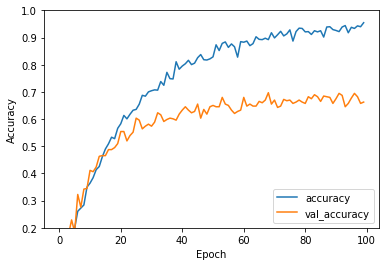

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [19]:
model.save('atoz_cnn_model')

INFO:tensorflow:Assets written to: atoz_cnn_model/assets


In [100]:
# np.argmax(model.predict(X_test), axis = 1)

In [101]:
# matrix = np.zeros((16,16))
# for y in y_test:
    

In [20]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(X_test), axis = 1)
confusion_matrix(y_test, y_pred)

array([[14,  0,  1,  0,  2,  0,  1,  0,  0,  1,  1,  1,  0,  1,  0,  0,
         0,  0,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 21,  2,  5,  1,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,
         1,  0,  1,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  3, 19,  1,  2,  0,  5,  1,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0, 21,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1, 14,  1,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 16,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  2,  1,  1,  1,  0, 21,  3,  0,  1,  0,  1,  0,  0,  0,  2,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  1, 23,  0,  0,  0,  1,  2,  1,  0,  2,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 